In [1]:
%matplotlib inline
import sys
sys.path.append('path to plantcv')
# Modify plantcv_directory to the directory where PlantCV is installed (e.g. /home/jdoe/plantcv/)
from matplotlib import pyplot as plt
import plantcv as pcv
import cv2
import numpy as np
from plantcv.dev.color_palette import color_palette
from math import sqrt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,10)
# (10,10) in the line above controls displayed image resolution. Bigger images better display squares drawn in several steps below.

/Users/mgehan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Set variables
device = 0
debug = 'plot'
vis_img = './2017-02-27_1630_ch129-pos07.jpg'
# Modify image_file to the directory and file for an image to be processed (e.g. /home/jdoe/timelapse_images/image1.jpg)

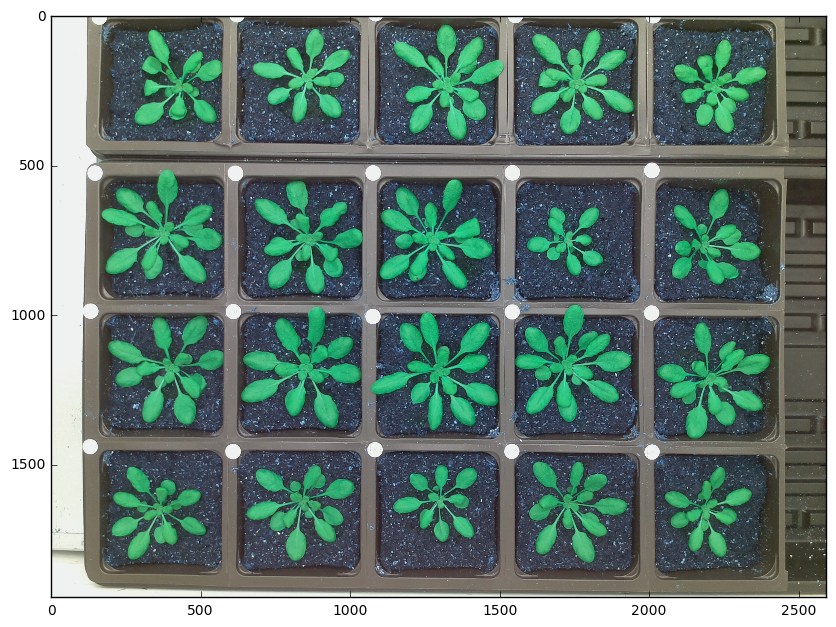

In [3]:
# Read VIS image
img, path, filename = pcv.readimage(vis_img)
plt.imshow(img)
plt.show()

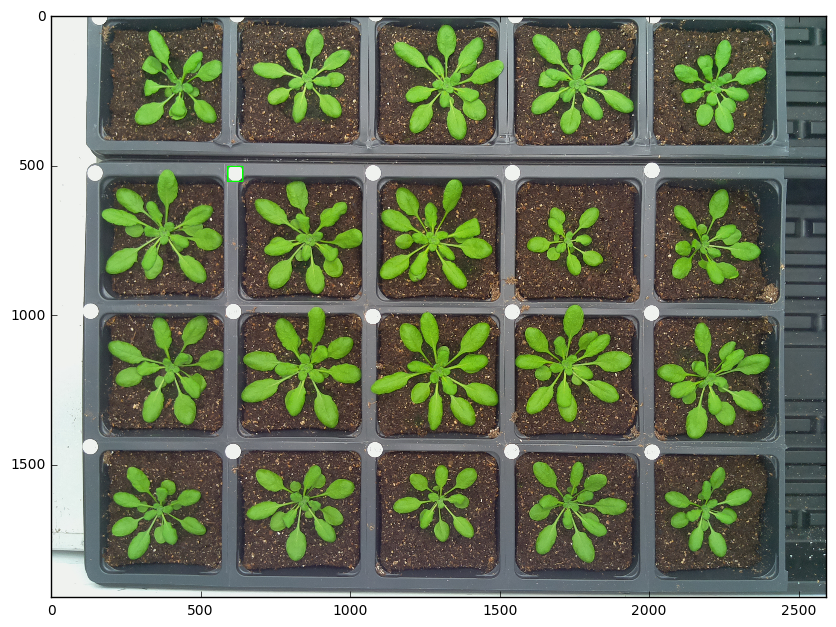

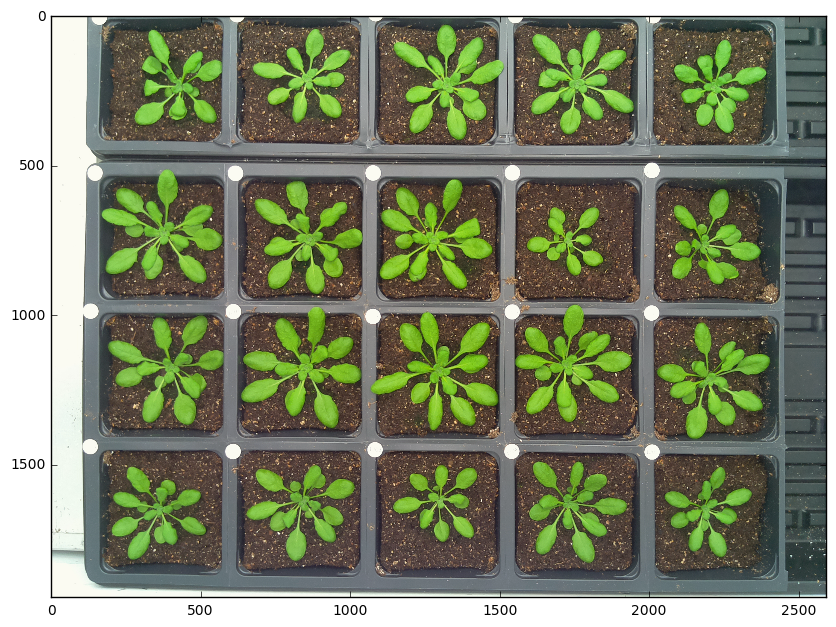

In [4]:
#white balance image based on white spot
device,img1=pcv.white_balance(device,img,debug,(590,505,50,50))
# Modify the 4 coordinates in parenthesis to frame a white part of the image

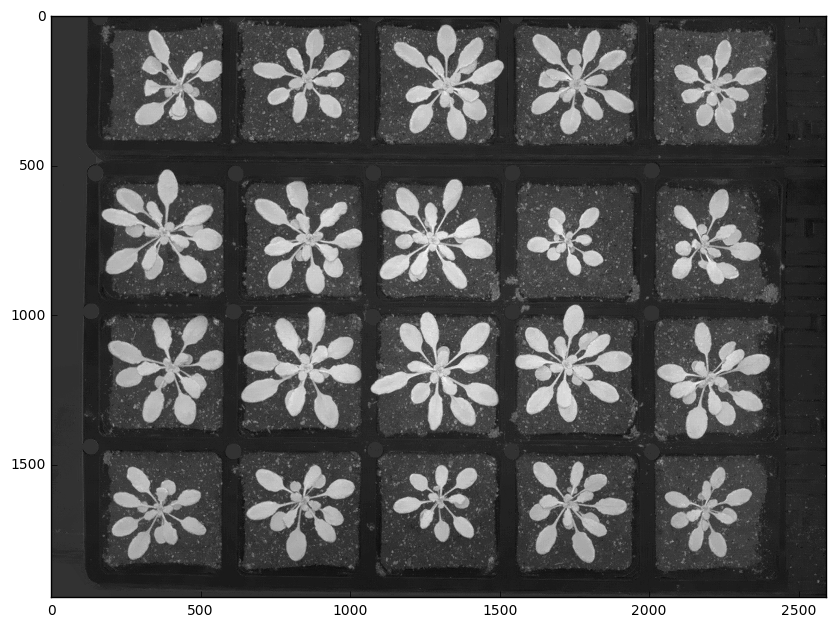

In [5]:
# Convert RBG to Grey using Blue-Yellow Channel 
device, b = pcv.rgb2gray_lab(img1, 'b', device, debug)
# Channel 'b' should make the plant brighter over background. Otherwise, use channel 'l' or 'a'. 

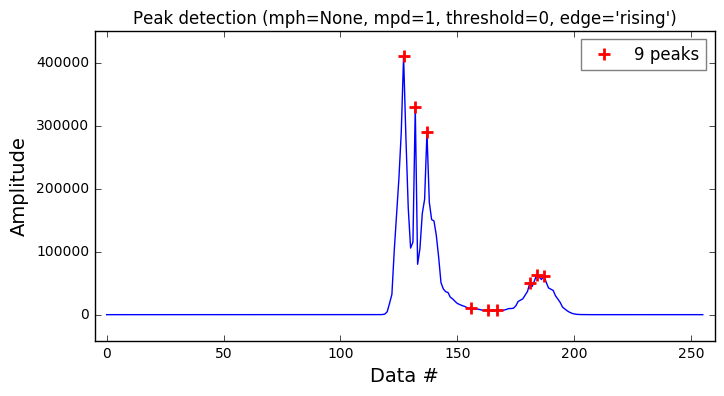

/Users/mgehan/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Threshold value = 162


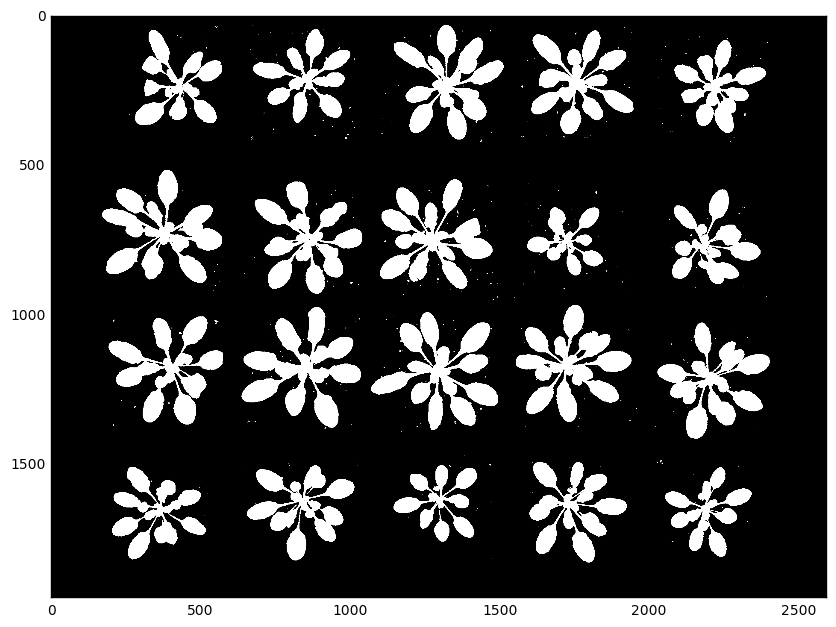

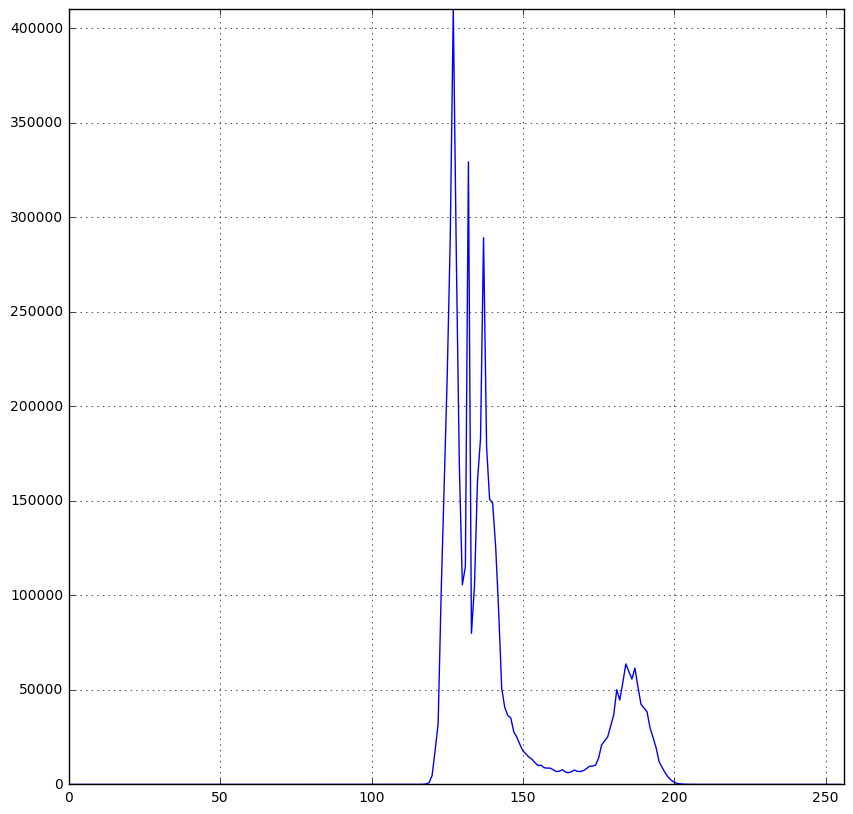

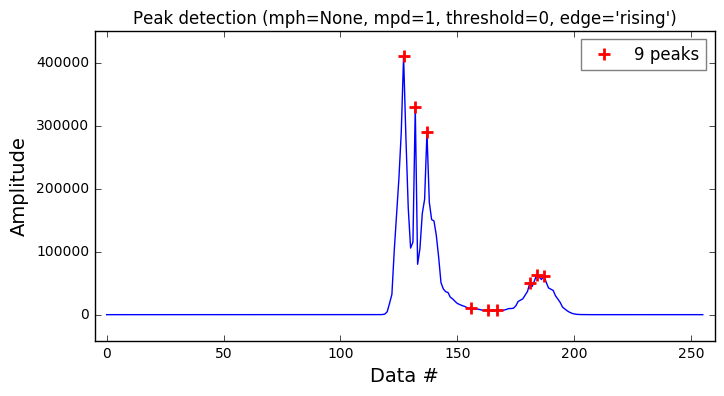

Threshold value = 162


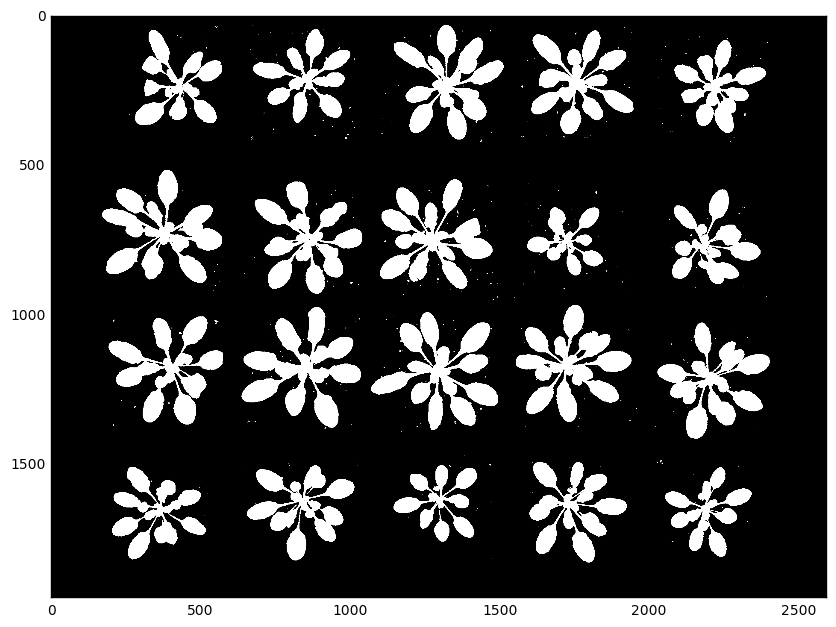

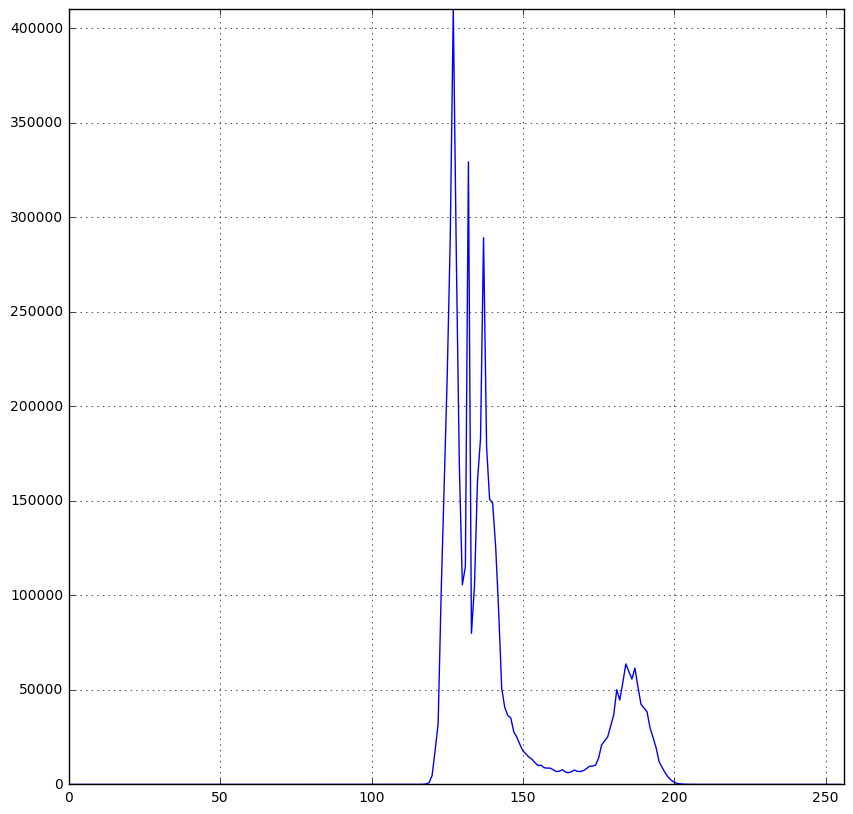

In [6]:
# Triangle Thresholded
device, tri_img = pcv.triangle_auto_threshold(device, b, 255, 'light', 35, debug)
device, tri_img_cnt = pcv.triangle_auto_threshold(device, b, 255, 'light', 35, debug)
# Thresholds based on a value 35. Modify the number 35 in both lines above to threshold plant from background.

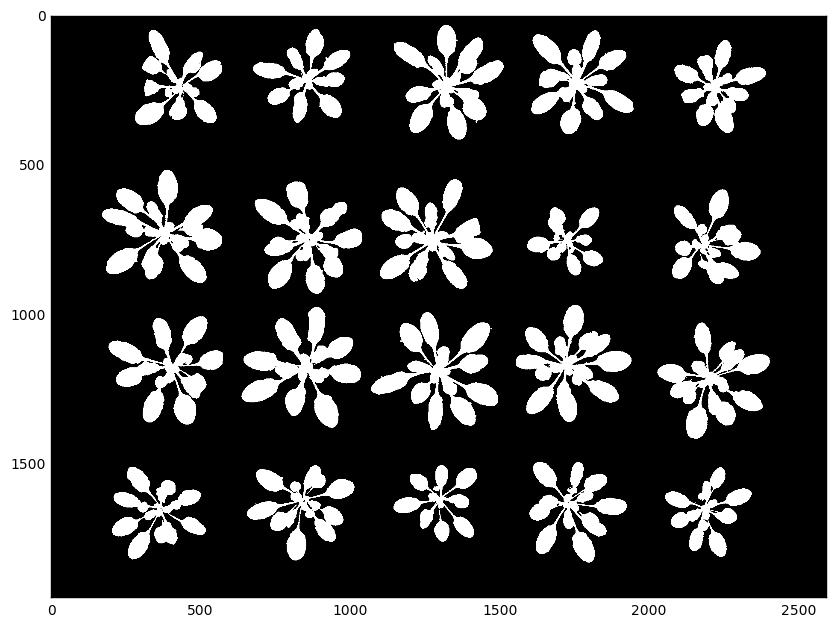

In [7]:
# Fill small objects
device, b_fill = pcv.fill(tri_img, tri_img_cnt, 80, device, debug)
# Modify the number 80 to what best fills holes in the plant (white) and background (black)

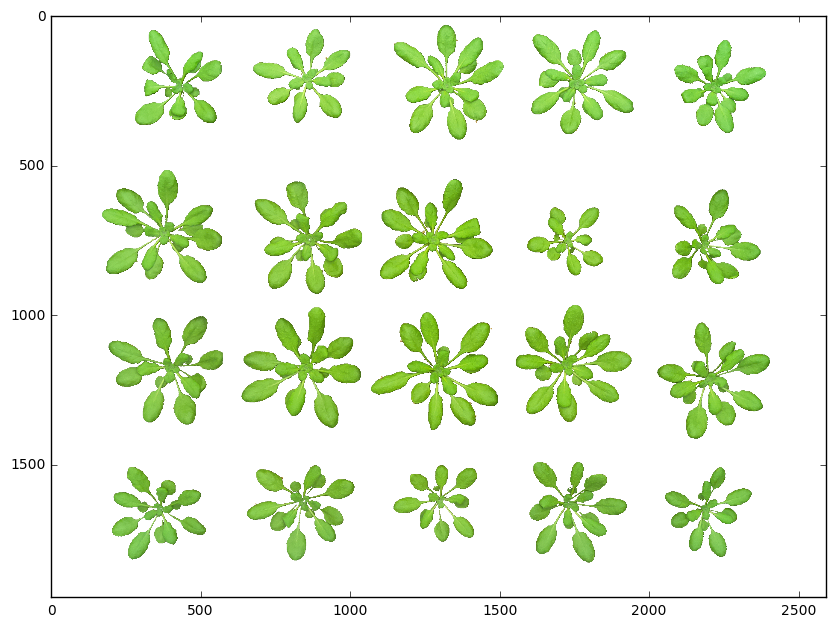

In [8]:
# Mask white-balanced image (here, based on blue channel)
device, masked = pcv.apply_mask(img1, b_fill, 'white', device, debug)

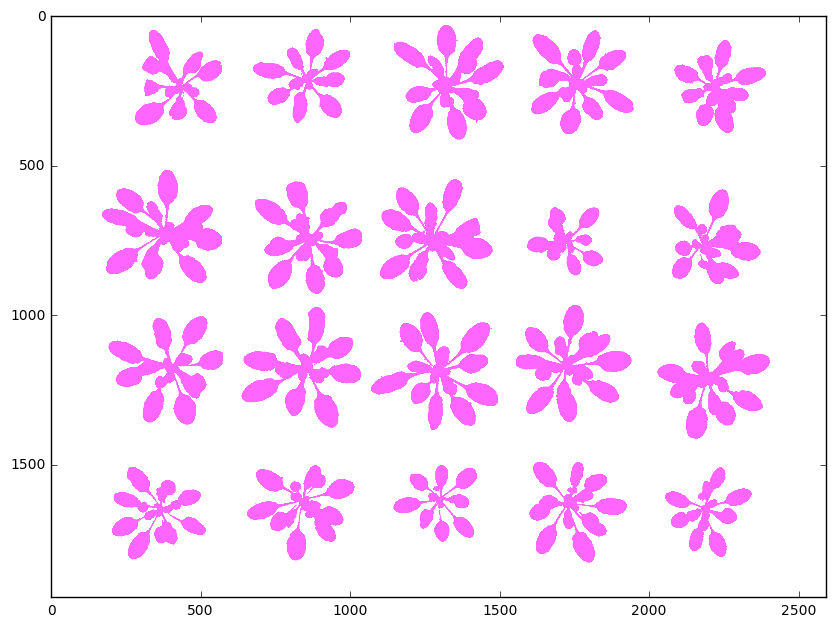

In [9]:
# Identify objects
device, id_objects, obj_hierarchy = pcv.find_objects(masked, b_fill, device, debug)

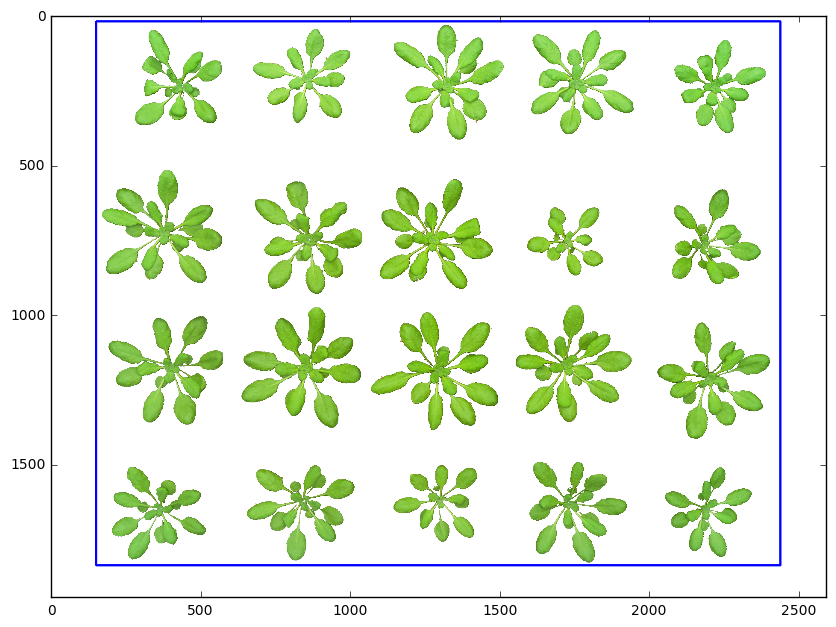

In [10]:
# Define region of interest
device, roi1, roi_hierarchy = pcv.define_roi(masked, 'rectangle', device, None, 'default', debug, True, 
                                             150, 20, -150, -100)
# Modify the 4 coordinates in parenthesis to frame the image area where the plants are.

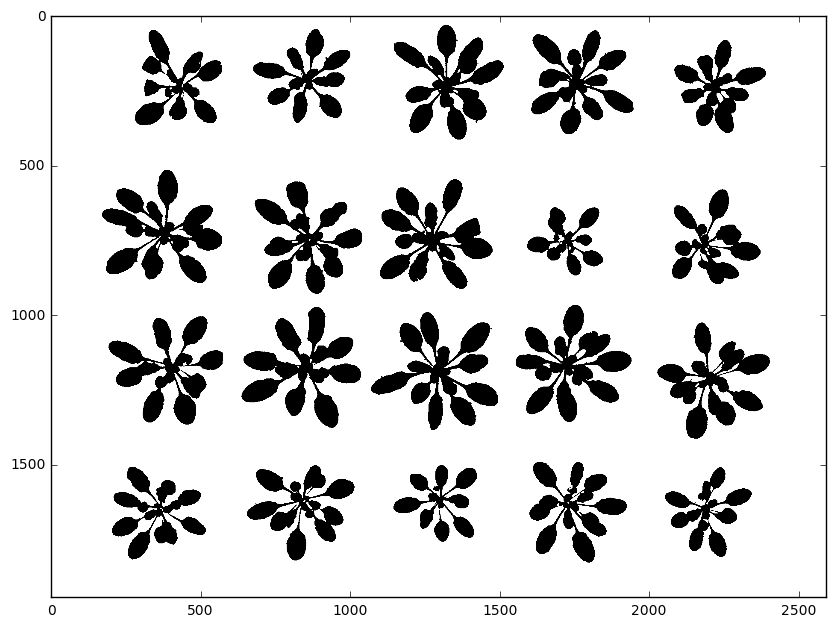

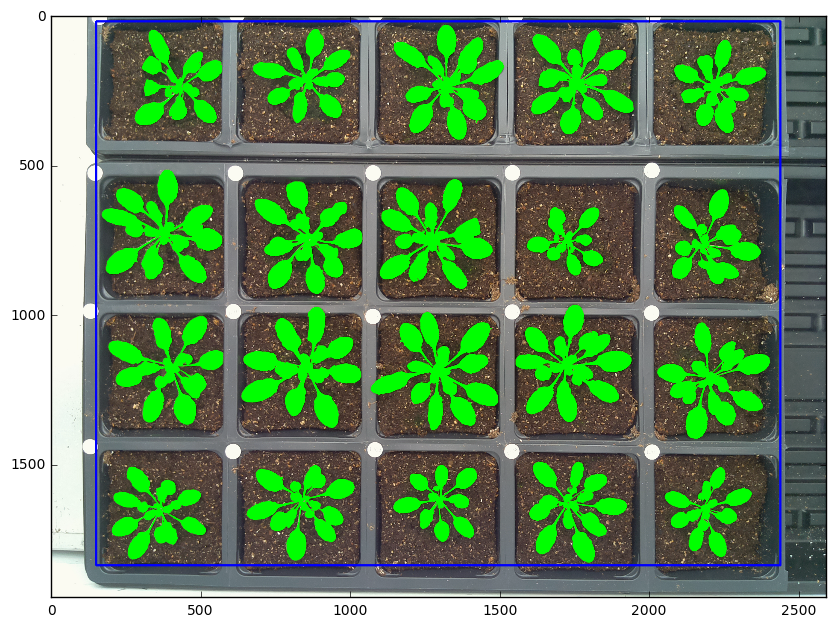

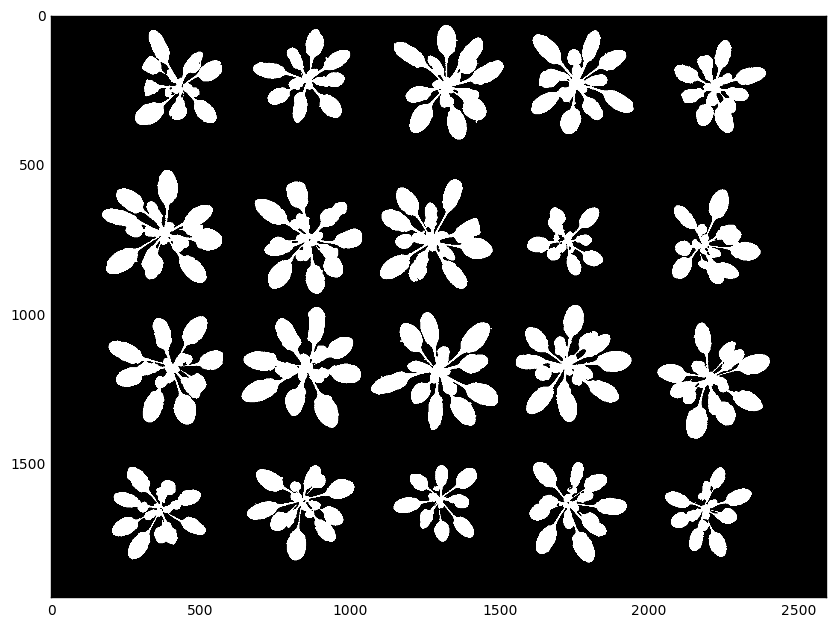

In [11]:
# Decide which objects to keep
device, roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img1, 'partial', roi1, roi_hierarchy, id_objects, obj_hierarchy, device, debug)

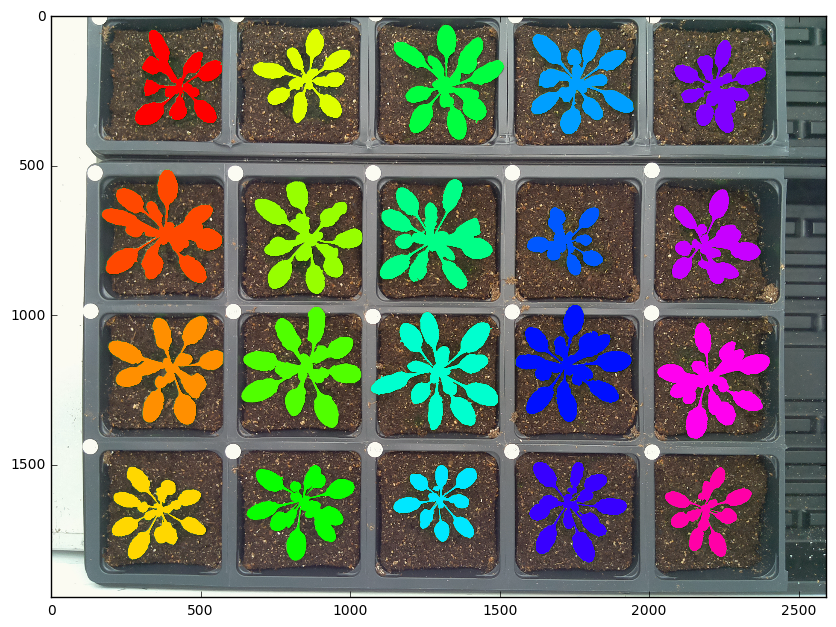

20


In [14]:
device, clusters_i, contours=pcv.cluster_contours(device,img1, roi_objects,4,5,debug)
print(len(clusters_i))

In [ ]:
out='/path/for/split/images/'
# Modify out to an appropriate path to a folder in which to store split plant images
device, output_path=pcv.cluster_contour_splitimg(device,masked,clusters_i,contours,out,filename,None, debug)
print(output_path)

In [ ]:
# Detect and measure size marker (white Tough-Spot)
device, marker_header,marker_data,images=pcv.report_size_marker_area(img1, 'rectangle', device, debug='plot', marker='detect', x_adj=580, 
                                                                     y_adj=490, w_adj=-1930, h_adj=-1370, base='black', objcolor='light', 
                                                                     thresh_channel='v', thresh=190, filename=False)
# Modify the 4 coordinates in parenthesis (x_adj, y_adj, w_adj and h_adj) to draw a square that encases the size marker.
# Modify 'thresh_channel' and 'thresh' values to threshold the size marker from the background.

In [ ]:
# Displays results of size marker analysis
print(marker_header)
print(marker_data)